# Word Semantic Similarity using Word2Vec 

## Word2Vec

- Word2Vec is a group of related models that are used to produce word embeddings.


- Models are shallow neural networks that are trained to reconstruct linguistic contexts of words. 


- Word2Vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space. It represents words as M-dimensional real vectors.


- Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

- Word2vec tends to indicate similar words – but the kind of similarity it learns includes more than just pure synonyms.

- Word2Vec takes raw text as input and learns a word by
    - Predicting its surrounding context (in the case of the skip-gram model), or,
    - Predict a word given its surrounding context (in the case of the Continous Bag of Words, CBOW model),  using gradient descent with randomly initialized vectors.

- The probability of predicting a word (Vo) given its 'context' (Vi) relates to maximising the joint distribution: log(P(Vi/Vo)/P(Vi))

### Process:

- Represent words as 'one-hot' encoded vectors
- Initialize weights based on the count of words and the required dimension (WxD)
- Compute the vectors in the forward propogation phase and adjust the weights in the back-propagation phase.
- Iterate above steps until minimum error or convergence.

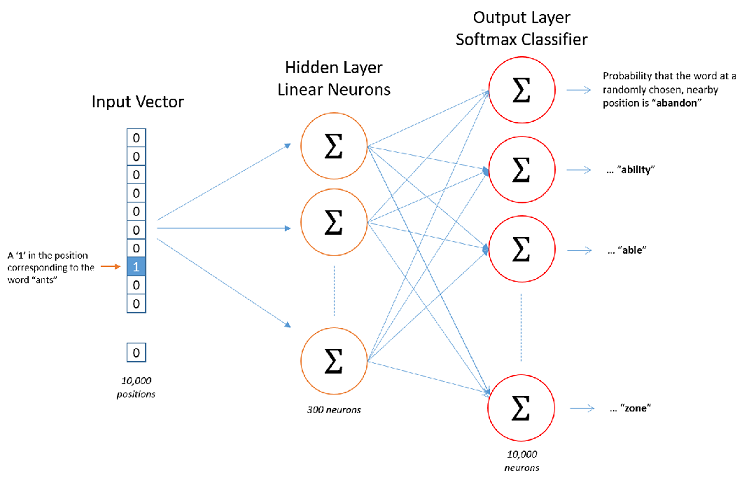

### Additive compositionality

Word vectors obtained from Word2Vec show not only syntactic but also semantic relationships between words. They exhibit a property referred to as 'additive compositionality'. This means word vectors can be seen as representing the distribution of the context in which a word appears and the sum of vectors roughly represents an AND concatenation. This means algebraic operation can be performed on the word vectors.

#### E.g. vector(‘King’) – vector(‘Man’) + vector(‘Woman’) = vector(‘Queen’)

In [68]:
print pandas.DataFrame(model_wv_google.most_similar_cosmul(positive=['king', 'woman'], negative=['man'], topn=5), columns=['Word','Score'])

            Word     Score
0  queen          0.931412
1  monarch        0.858534
2  princess       0.847657
3  Queen_Consort  0.815027
4  queens         0.809982


### Similarity Measures

##### Cosine
This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. The method corresponds to the word-analogy and distance scripts in the original word2vec implementation.

##### CosMul
Helps to find the top-N most similar words using the multiplicative combination objective. Positive words still contribute positively towards the similarity, negative words negatively, but with less susceptibility to one large distance dominating the calculation.

### Pre-Trained Word Embedding Models

### 1. GoogleNews

#### Pre-trained Google News corpus (~100 billion words) word vector model (3 million 300-dimension English word vectors).

In [50]:
import logging
import pandas
from gensim import models
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# load word vectors
model_wv_google = models.KeyedVectors.load_word2vec_format('../embedding/GoogleNews-vectors-negative300.bin.gz',binary=True)

print("Computing Synonym for words....")
print("Words: happy, sorrow, country, food, magic, star, fintech, movies, animation, retail")

# define array of words
words_array = ['happy', 'sorrow', 'country', 'food', 'magic', 'star', 'movies', 'animation', 'retail', 'fintech']

for word in words_array:
    print("WORD: " + word)
    try:
        print("Words similar by Cosine similarity: ")
        df = pandas.DataFrame(model_wv_google.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
        print("Words similar by CosMul similarity: ")
        df = pandas.DataFrame(model_wv_google.most_similar_cosmul(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found - " + word + ". Skipping...")

2017-10-27 07:46:52,778 : INFO : loading projection weights from ../embedding/GoogleNews-vectors-negative300.bin.gz
2017-10-27 07:50:28,154 : INFO : loaded (3000000, 300) matrix from ../embedding/GoogleNews-vectors-negative300.bin.gz
2017-10-27 07:50:28,156 : INFO : precomputing L2-norms of word weight vectors


Computing Synonym for words....
Words: happy, sorrow, country, food, magic, star, fintech, movies, animation, retail
WORD: happy
Words similar by Cosine similarity: 
           Word     Score
0  glad          0.740889
1  pleased       0.663217
2  ecstatic      0.662691
3  overjoyed     0.659929
4  thrilled      0.651405
5  satisfied     0.643795
6  proud         0.636042
7  delighted     0.627238
8  disappointed  0.626995
9  excited       0.624767
Words similar by CosMul similarity: 
           Word     Score
0  glad          0.870444
1  pleased       0.831608
2  ecstatic      0.831345
3  overjoyed     0.829964
4  thrilled      0.825702
5  satisfied     0.821897
6  proud         0.818020
7  delighted     0.813618
8  disappointed  0.813497
9  excited       0.812383
WORD: sorrow
Words similar by Cosine similarity: 
               Word     Score
0  sadness           0.865306
1  anguish           0.763049
2  grief             0.754967
3  profound_sorrow   0.688777
4  deepest_sorrow    0.68

### 2. GloVe: Global Vectors for Word Representation
#### Wikipedia 2014 + Gigaword 5 (6B tokens, 400K vocab, uncased, 50d, 100d, 200d, & 300d vectors, 822 MB download): glove.6B.zip

In [51]:
import logging
import pandas
from gensim import models
import pandas
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# load word vectors
model_wv_glove = models.KeyedVectors.load_word2vec_format('../embedding/glove-word2vec.txt')

print("Computing Synonymn for words....")
print("Words: happy, sorrow, country, food, magic, star, fintech, movies, animation, retail")

# define array of words
words_array = ['happy', 'sorrow', 'country', 'food', 'magic', 'star', 'fintech', 'movies', 'animation', 'retail']

for word in words_array:
    print("WORD: " + word)
    try:
        print("Words similar by Cosine similarity: ")
        df = pandas.DataFrame(model_wv_glove.most_similar(positive=[word], topn=10))
        print df
        print("Words similar by CosMul similarity: ")
        df = pandas.DataFrame(model_wv_glove.most_similar_cosmul(positive=[word], topn=10))
        print df
    except KeyError:
        print("Word not found - " + word + ". Skipping...")

2017-10-27 07:52:25,408 : INFO : loading projection weights from ../embedding/glove-word2vec.txt
2017-10-27 07:54:40,122 : INFO : loaded (400000, 300) matrix from ../embedding/glove-word2vec.txt
2017-10-27 07:54:40,124 : INFO : precomputing L2-norms of word weight vectors


Computing Synonymn for words....
Words: happy, sorrow, country, food, magic, star, fintech, movies, animation, retail
WORD: happy
Words similar by Cosine similarity: 
           0         1
0  'm         0.708012
1  glad       0.690503
2  pleased    0.671247
3  really     0.657590
4  always     0.649467
5  everyone   0.644904
6  everybody  0.634436
7  feel       0.633681
8  i          0.629831
9  sure       0.629091
Words similar by CosMul similarity: 
           0         1
0  'm         0.854005
1  glad       0.845251
2  pleased    0.835623
3  really     0.828794
4  always     0.824733
5  everyone   0.822451
6  everybody  0.817217
7  feel       0.816840
8  i          0.814915
9  sure       0.814544
WORD: sorrow
Words similar by Cosine similarity: 
             0         1
0  sadness      0.835528
1  grief        0.756200
2  anguish      0.738144
3  regret       0.705060
4  gratitude    0.632629
5  condolences  0.618488
6  despair      0.614616
7  sympathy     0.599212
8  remorse     

## Training a model with custom dataset
We can also train our own Word2vec model using a custom dataset, to extract domain relevant synonym and similarities.

#### Broadly three phases:
- Text pre-processing and feature generation
- Training the model providing the features and training parameters
- Save the model and load for future use


#### The pre-processing process is as follows:
- Tokenize input sentences/paragrahs and convert each word token into lowercase
- Remove stopwords (e.g. 'and','the','a')
- Perform Lemmatization so as to bring word tokens to the base format.
  Lemmatisation is used to determine the lemma of a word based on its intended meaning. Unlike stemming, lemmatisation depends on the intended part of speech and meaning of a word in a sentence.

#### While training the model, we consider the following parameters:
- Input sentences (obtained from previous step)
- Size of the word vector dimension (300)
- Window size to consider as the maximum distance between the current and predicted word within a sentence
- Minimum frequency a word should occur to be considered for training (3)
- Number of iterations (epoch)
- Mode chosen - either Continous Bag Of Words(CBOW) or Skip-gram (we choose Skip-gram)

In [ ]:
import logging
from gensim import models
import sys
import os.path
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import string
import re


logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Read training file and load to array
def readFileAndPreprocess(filename):
	stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
	wordnet_lemmatizer = WordNetLemmatizer()
	sentences = [] # init empty array for training data
	with open(filename) as f:
		content = f.readlines()
		# For each record remove stopwords
		for record in content:
			record = unicode(record.lower(), "utf-8")
			record = word_tokenize(record)
			record = [wordnet_lemmatizer.lemmatize(x) for x in record if x not in string.punctuation ]
			sentence = [w for w in record if w not in stopwords]
			sentences.append(sentence)
	return sentences

training_set = sys.argv[1]

try:
	os.path.isfile(training_set) # check if file exists
	print("Reading training data from file: " + training_set)
	sentences = readFileAndPreprocess(training_set)

	# Train word2vec model and save word vectors to file
	print("Training Word2Vec model....")
	model = models.Word2Vec(sentences, size=300, window=5, min_count=3, workers=64, iter=1000, sg=1) #skip-gram,sg=1
	word2vec_model = model
	print("Model Completed training!")
	print("Saving model..")
	word2vec_model.save(sys.argv[2])
	print("Model stored in: " + sys.argv[2])

except OSError:
	print("Invalid File path!. Exiting.")

### 1. Amazon Food Dining Dataset
#### ~500,000 food reviews from Amazon https://www.kaggle.com/snap/amazon-fine-food-reviews/data 

The Amazon Fine Food Reviews dataset consists of 568,454 food reviews Amazon users left up to October 2012.

 Trained on 2532725200 raw words (2254738977 effective words).
 
 Iterations: 100, Dimension size: 300

In [52]:
import logging
import pandas
from gensim import models
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# load word vectors
model = models.Word2Vec.load('../embedding/food-word2vec.model')
model_wv_food = model.wv
print("Words similar by Cosine similarity: ")
words_array = ['gift', 'star', 'delivery']

for word in words_array:
    print("WORD: " + word)
    try:
        df = pandas.DataFrame(model_wv_food.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found - " + word + ". Skipping...")

2017-10-27 07:56:52,993 : INFO : loading Word2Vec object from ../embedding/food-word2vec.model
2017-10-27 07:56:53,283 : INFO : loading wv recursively from ../embedding/food-word2vec.model.wv.* with mmap=None
2017-10-27 07:56:53,285 : INFO : loading syn0 from ../embedding/food-word2vec.model.wv.syn0.npy with mmap=None
2017-10-27 07:56:54,225 : INFO : setting ignored attribute syn0norm to None
2017-10-27 07:56:54,226 : INFO : loading syn1neg from ../embedding/food-word2vec.model.syn1neg.npy with mmap=None
2017-10-27 07:56:55,177 : INFO : setting ignored attribute cum_table to None
2017-10-27 07:56:55,179 : INFO : loaded ../embedding/food-word2vec.model
2017-10-27 07:56:55,352 : INFO : precomputing L2-norms of word weight vectors


Words similar by Cosine similarity: 
WORD: gift
        Word     Score
0  christmas  0.710675
1  basket     0.663248
2  recipient  0.648269
3  birthday   0.624336
4  present    0.551398
5  stuffer    0.550811
6  valentine  0.535837
7  xmas       0.535195
8  basket..   0.516378
9  holiday    0.498228
WORD: star
        Word     Score
0  rating     0.696299
1  -minus     0.587418
2  'leakers   0.553210
3  stars.     0.526907
4  half-star  0.512984
5  assigning  0.499092
6  dout       0.497873
7  5          0.492000
8  stars-     0.484024
9  6/5        0.483482
WORD: delivery
        Word     Score
0  shipment   0.608006
1  delivered  0.598283
2  shipping   0.596473
3  godsend-   0.542538
4  shipped    0.539969
5  service    0.537631
6  prompt     0.529447
7  ship       0.509131
8  delivery.  0.491290
9  updated..  0.482031


### 2.A Bible in basic English
#### Kaggle dataset https://www.kaggle.com/oswinrh/bible/data 
Trained on 407239000 raw words (295296026 effective words).

Iterations: 1000, Dimension size: 300

Using Skip-gram model

In [53]:
import logging
import pandas
from gensim import models
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# load word vectors
model = models.Word2Vec.load('../embedding/bible-word2vec.model')
model_wv_bible_sg = model.wv

# define array of words
words_array = ['god','star','faith', 'cross']
print("Words similar by Cosine similarity: ")
    
for word in words_array:
    print("WORD: " + word)
    try:
        df = pandas.DataFrame(model_wv_bible_sg.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found - " + word + ". Skipping...")

2017-10-27 07:57:05,961 : INFO : loading Word2Vec object from ../embedding/bible-word2vec.model
2017-10-27 07:57:06,163 : INFO : loading wv recursively from ../embedding/bible-word2vec.model.wv.* with mmap=None
2017-10-27 07:57:06,164 : INFO : setting ignored attribute syn0norm to None
2017-10-27 07:57:06,165 : INFO : setting ignored attribute cum_table to None
2017-10-27 07:57:06,166 : INFO : loaded ../embedding/bible-word2vec.model
2017-10-27 07:57:06,174 : INFO : precomputing L2-norms of word weight vectors


Words similar by Cosine similarity: 
WORD: god
               Word     Score
0  lord              0.468206
1  give              0.321597
2  grace             0.306305
3  ithrite           0.295166
4  mikloth           0.289910
5  worshipper        0.285231
6  ahio              0.284701
7  wind-instruments  0.283968
8  glory             0.283407
9  worship           0.282527
WORD: star
         Word     Score
0  heaven      0.342713
1  moon        0.288913
2  two-edged   0.284936
3  brighter    0.280657
4  becoming    0.254215
5  worshipper  0.251062
6  bright      0.246979
7  abraham     0.245216
8  sun         0.242776
9  unchanging  0.238530
WORD: faith
            Word     Score
0  hope           0.333375
1  christ         0.294178
2  wisdom         0.276601
3  salvation      0.276555
4  love           0.274371
5  god            0.270297
6  hearer         0.267657
7  based          0.264440
8  timothy        0.262907
9  righteousness  0.260266
WORD: cross
        Word     Score
0  j

### 2.B Bible
Using Continous Bag of Words (CBOW) model

In [54]:
import logging
import pandas
from gensim import models
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# load word vectors
model = models.Word2Vec.load('../embedding/bible-cbow-word2vec.model')
model_wv_bible_cbow = model.wv

# define array of words
words_array = ['god','star','faith', 'cross']
print("Words similar by Cosine similarity: ")
    
for word in words_array:
    print("WORD: " + word)
    try:
        df = pandas.DataFrame(model_wv_bible_cbow.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found - " + word + ". Skipping...")

2017-10-27 07:57:10,155 : INFO : loading Word2Vec object from ../embedding/bible-cbow-word2vec.model
2017-10-27 07:57:10,301 : INFO : loading wv recursively from ../embedding/bible-cbow-word2vec.model.wv.* with mmap=None
2017-10-27 07:57:10,302 : INFO : setting ignored attribute syn0norm to None
2017-10-27 07:57:10,303 : INFO : setting ignored attribute cum_table to None
2017-10-27 07:57:10,304 : INFO : loaded ../embedding/bible-cbow-word2vec.model
2017-10-27 07:57:10,313 : INFO : precomputing L2-norms of word weight vectors


Words similar by Cosine similarity: 
WORD: god
    Word     Score
0  lord   0.658754
1  ''     0.543459
2  ``     0.485857
3  ha     0.393050
4  say    0.383421
5  u      0.375947
6  give   0.375467
7  name   0.367225
8  given  0.363422
9  ever   0.356873
WORD: star
     Word     Score
0  sky     0.317151
1  arch    0.316245
2  snow    0.311528
3  dew     0.297181
4  black   0.295145
5  mist    0.281507
6  bright  0.269884
7  sun     0.267162
8  cloud   0.254671
9  light   0.253995
WORD: faith
            Word     Score
0  hope           0.427250
1  christ         0.360321
2  god            0.353349
3  righteousness  0.349535
4  true           0.342959
5  law            0.342008
6  word           0.317370
7  wisdom         0.313897
8  love           0.313820
9  thing          0.307310
WORD: cross
        Word     Score
0  nailed     0.330490
1  pilate     0.324577
2  barabbas   0.307545
3  pointing   0.296651
4  nazarene   0.291251
5  underwent  0.284718
6  undergo    0.259190
7  ponti

## Compare Similarities between models

In [69]:
def find_similar(word):
    print("----------------******START*****----------------")
    print("WORD: " + word)
    print("Computing Similarity Using Model: GoogleNews")
    try:
        df = pandas.DataFrame(model_wv_google.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found in GoogleNews - " + word + ". Skipping...")

    print("Computing Similarity Using Model: GloVe")
    try:
        df = pandas.DataFrame(model_wv_glove.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found in GloVe - " + word + ". Skipping...")

    print("Computing Similarity Using Model: Food")
    try:
        df = pandas.DataFrame(model_wv_food.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found in Food - " + word + ". Skipping...")
        
    print("Computing Similarity Using Model: Bible")
    try:
        df = pandas.DataFrame(model_wv_bible_sg.most_similar(positive=[word], topn=10), columns=['Word','Score'])
        print(df)
    except KeyError:
        print("Word not found in Bible - " + word + ". Skipping...")
        
    print("----------------******END*****----------------")

## Try your own 

In [70]:
find_similar('growth')
find_similar('star')
find_similar('finance')
find_similar('investment')
find_similar('acquire')
find_similar('loss')

----------------******START*****----------------
WORD: growth
Computing Similarity Using Model: GoogleNews
                   Word     Score
0  growthin              0.622422
1  grwoth                0.608003
2  Growth                0.605946
3  exponential_growth    0.576093
4  expansion             0.573094
5  reacceleration        0.564692
6  double_digit_growths  0.561573
7  noninflationary       0.559182
8  economicgrowth        0.555412
9  slowdown              0.553737
Computing Similarity Using Model: GloVe
       Word     Score
0  economic  0.668446
1  economy   0.667751
2  slowing   0.640928
3  increase  0.629197
4  gdp       0.617421
5  decline   0.611499
6  rise      0.607873
7  recovery  0.607726
8  slowdown  0.606292
9  grow      0.604086
Computing Similarity Using Model: Food
            Word     Score
0  grow           0.470401
1  growing        0.466358
2  growth/fast    0.456966
3  184.1555       0.445261
4  streptococcus  0.441660
5  pneumoniae     0.435152
6  plant 